<a href="https://colab.research.google.com/github/konstantin-gm/timelab/blob/main/regres_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.signal import detrend

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving gps_l1c_long.csv to gps_l1c_long (1).csv


In [ ]:
fname = list(uploaded.items())[0][0]
print(fname)

gps_l1c_long.csv


# Аппроксимация полиномом, используя numpy.polyfit
## Предсказание на основе полиномиальной модели 

In [ ]:
data = np.genfromtxt(fname, delimiter=";")

In [ ]:
n_total = len(data)
n_train = int(n_total * 0.8)

Коэффициенты полинома: [-1.82208916e-21 -2.91512830e-16  1.15018642e-07]


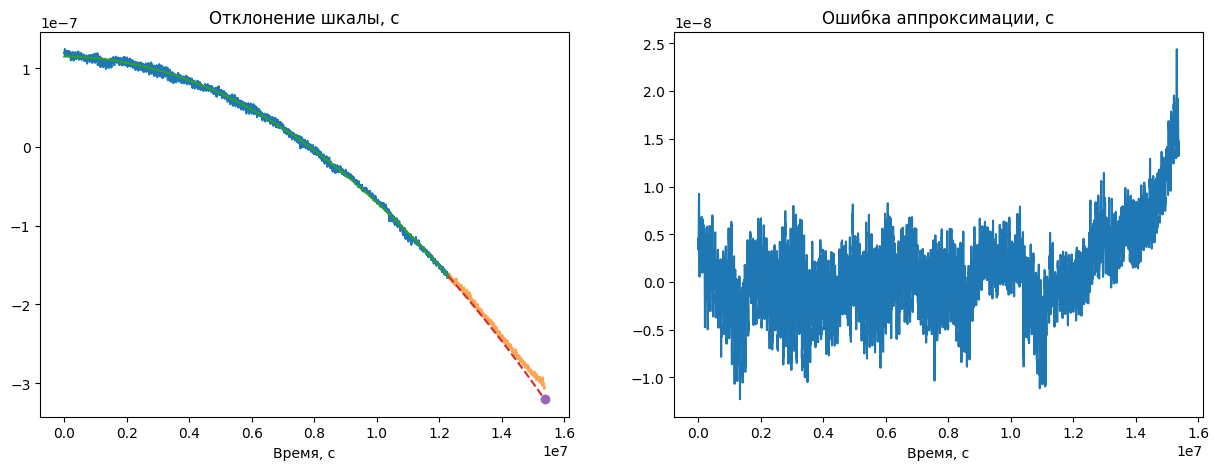

In [ ]:
data = np.genfromtxt(fname, delimiter=";")

n = len(data)

m = 2
p = np.polyfit(data[:n_train, 0], data[:n_train, 1], m)

y_appr = np.zeros(n)
k = 0
while k < m:    
    y_appr += p[k]*data[:, 0]**(m-k)
    k += 1
y_appr += p[m]

print("Коэффициенты полинома:", p)

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
axs[0].plot(data[:n_train, 0], data[:n_train, 1])
axs[0].plot(data[n_train:-1, 0], data[n_train:-1, 1], alpha=0.7)
axs[0].plot(data[:n_train, 0], y_appr[:n_train])
axs[0].plot(data[n_train:-1, 0], y_appr[n_train:-1], '--')
axs[0].plot(data[-1, 0], y_appr[-1], 'o')
axs[0].set_title("Отклонение шкалы, с")
axs[1].plot(data[:, 0], data[:, 1]-y_appr, '-')
axs[1].set_title("Ошибка аппроксимации, с")
for ax in axs.flat:
    ax.set(xlabel='Время, с', ylabel = '')


# Линейная регрессия с нелинейными признаками

In [ ]:
# Формируем матрицк признаков

x1 = np.ones(n_train, dtype = 'float')
x2 = data[:n_train, 0]
w = 2.*np.pi/86400.
x3 = np.cos(w*x2)
x4 = np.sin(w*x2)
x5 = np.cos(2*w*x2)
x6 = np.sin(2*w*x2)
# x7 = data[:n_train, 0]**2
# x8 = data[:n_train, 0]**3
# x9 = data[:n_train, 0]**4
# x10 = data[:n_train, 0]**5
# x11 = data[:n_train, 0]**6
# x12 = data[:n_train, 0]**7

Xtrain = np.c_[x1, x2, x3, x4, x5, x6]
Xtrain.shape

(12498, 6)

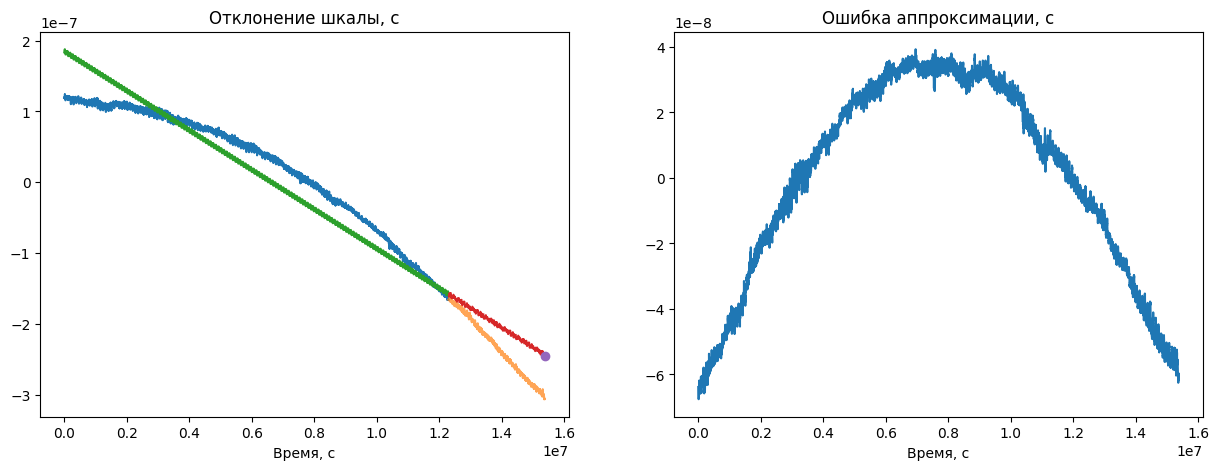

In [ ]:
x1 = np.ones(n, dtype = 'float')
x2 = data[:, 0]
w = 2.*np.pi/86400.
x3 = np.cos(w*x2)
x4 = np.sin(w*x2)
x5 = np.cos(2*w*x2)
x6 = np.sin(2*w*x2)
# x7 = data[:n_train, 0]**2
# x8 = data[:n_train, 0]**3
# x9 = data[:n_train, 0]**4
# x10 = data[:n_train, 0]**5
# x11 = data[:n_train, 0]**6
# x12 = data[:n_train, 0]**7

Xpredict = np.c_[x1, x2, x3, x4, x5, x6]
md = LinearRegression()
reg = md.fit(Xpredict, data[:, 1])
y_appr = md.predict(Xpredict)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(data[:n_train, 0], data[:n_train, 1])
axs[0].plot(data[n_train:-1, 0], data[n_train:-1, 1], alpha=0.7)
axs[0].plot(data[:n_train, 0], y_appr[:n_train])
axs[0].plot(data[n_train:-1, 0], y_appr[n_train:-1], '--')
axs[0].plot(data[-1, 0], y_appr[-1], 'o')
axs[0].set_title("Отклонение шкалы, с")
axs[1].plot(data[:, 0], data[:, 1]-y_appr, '-')
axs[1].set_title("Ошибка аппроксимации, с")
for ax in axs.flat:
    ax.set(xlabel='Время, с', ylabel = '')